##### Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Prompting Quickstart with REST

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

If you want to quickly try out the Gemini API, you can use `curl` commands to call the methods in the REST API.

This notebook contains `curl` commands you can run in Google Colab, or copy to your terminal.

To run this notebook, your API key must be stored it in a Colab Secret named GOOGLE_API_KEY. If you are running in a different environment, you can store your key in an environment variable. See [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) to learn more.

In [2]:
import os
from google.colab import userdata

In [3]:
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

## Run your first prompt

Use the `generateContent` method to generate responses to your prompts. You can pass text directly to `generateContent`.


In [4]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [{
        "parts":[{"text": "Give me python code to sort a list."}]
        }]
       }' 2> /dev/null

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "```python\ndef sort_list(data):\n  \"\"\"\n  Sorts a list using the built-in `sorted()` function.\n\n  Args:\n    data: The list to be sorted.\n\n  Returns:\n    A new list containing the sorted elements. The original list remains unchanged.\n  \"\"\"\n  return sorted(data)\n\n\ndef sort_list_in_place(data):\n  \"\"\"\n  Sorts a list in place using the `list.sort()` method.\n\n  Args:\n    data: The list to be sorted.  This list *will* be modified.\n\n  Returns:\n    None.  The list is sorted directly.\n  \"\"\"\n  data.sort()  # Sorts the list directly\n  return data\n\n\n# Example usage:\nmy_list = [5, 2, 8, 1, 9, 4]\n\n# Using sorted() (creates a new list)\nsorted_list = sort_list(my_list)\nprint(\"Original list:\", my_list)  # Original list is unchanged\nprint(\"Sorted list (using sorted()):\", sorted_list)\n\n# Using list.sort() (modifies the original list)\nmy_list_to_sort_in_place = 

### Use images in your prompt

Here you will download an image from a URL and pass that image in the prompt.

In [5]:
%%bash

curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  2250k      0 --:--:-- --:--:-- --:--:-- 2252k


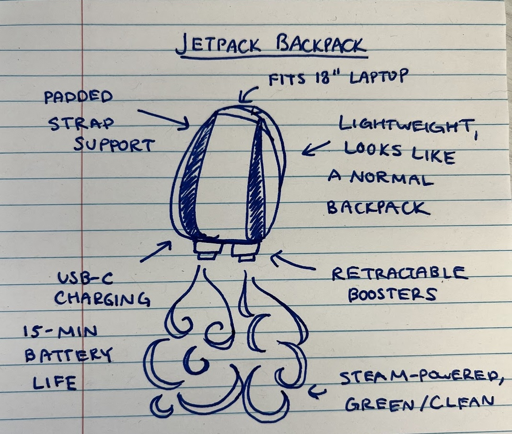

In [6]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img.resize((512, int(img.height*512/img.width)))

Now you will base64 encode the image, and include it in the prompt.

There are slight output differences of different base64 encoding tools, so you will need to pick the right one.

The following will work in Google Colab.

In [7]:
%%bash

echo '{
  "contents":[
    {
      "parts":[
        {"text": "This image contains a sketch of a potential product along with some notes. \
        Given the product sketch, describe the product as thoroughly as possible based on what you \
        see in the image, making sure to note all of the product features. Return output in json format: \
        {description: description, features: [feature1, feature2, feature3, etc]}"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -w0 image.jpg)'"
          }
        }
      ]
    }
  ]
}' > request.json

Then you can include the image in the prompt by just passing in the `request.json` created to `generateContent`.

In [8]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=${GOOGLE_API_KEY}" \
        -H 'Content-Type: application/json' \
        -d @request.json

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "```json\n{\n  \"description\": \"The Jetpack Backpack is designed to look like a normal, lightweight backpack while incorporating retractable boosters. It features padded straps for support and can fit an 18-inch laptop. The jetpack is steam-powered, offering a green and clean energy source. It charges via USB-C and has a 15-minute battery life.\",\n  \"features\": [\n    \"Fits 18\\\" laptop\",\n    \"Lightweight\",\n    \"Looks like a normal backpack\",\n    \"Padded strap support\",\n    \"USB-C charging\",\n    \"15-min battery life\",\n    \"Retractable boosters\",\n    \"Steam-powered\",\n    \"Green/Clean\"\n  ]\n}\n```"
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",
      "avgLogprobs": -0.2029749396388516
    }
  ],
  "usageMetadata": {
    "promptTokenCount": 1363,
    "candidatesTokenCount": 163,
    "totalTokenCount": 1526,
    "promptToken

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  467k    0  1358  100  466k    466   160k  0:00:02  0:00:02 --:--:--  160k


If you are running on a Mac, copy and paste this command into your terminal instead.

```
curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=${GOOGLE_API_KEY}" \
        -H 'Content-Type: application/json' \
        -d '{
  "contents":[
    {
      "parts":[
        {"text": "foo"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -i image.jpg)'"
          }
        }
      ]
    }
  ]
}'   2> /dev/null  | grep -C 5 "text"
```

Here image is being `base64` encoded, then savie the curl request with the image data in a JSON file. Run this cell to see which version of `base64` you have. Based on the output, you may need to run this request on either a Mac or on Colab.

In [9]:
%%bash

base64 --version | head -n 1

base64 (GNU coreutils) 8.32


If you get `FreeBSD base64 ...`, (Mac) use `base64 -i`.

If you get `base64 (GNU coreutils)...` (Colab) use `base64 -w0`.

### Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [10]:
%%bash
curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [
        {"role":"user",
         "parts":[{
           "text": "In one sentence, explain how a computer works to a young child."}]},
        {"role": "model",
         "parts":[{
           "text": "A computer is like a smart helper that can store information, do math problems, and follow our instructions to make things happen."}]},
        {"role": "user",
         "parts":[{
           "text": "Okay, how about a more detailed explanation to a high schooler?"}]},
      ]
    }' 2> /dev/null | grep -C 5 "text"

  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "A computer executes instructions written in programming languages to manipulate data stored in memory, using a central processing unit (CPU) to perform arithmetic and logical operations, input/output (I/O) devices to interact with the external world, and a hierarchical memory system (cache, RAM, storage) to efficiently manage data access and processing.\n"
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",


### Configuration

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. Learn more about [model parameters](https://ai.google.dev/docs/concepts#model_parameters).

For instance, `temperature` controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

The following example specifies values for all the parameters of the `generateContent` method.

In [11]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
        "contents": [{
            "parts":[
                {"text": "Give me a numbered list of cat facts."}
            ]
        }],
        "safetySettings": [
            {
                "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
                "threshold": "BLOCK_ONLY_HIGH"
            }
        ],
        "generationConfig": {
            "stopSequences": [
                "Title"
            ],
            "temperature": 0.9,
            "maxOutputTokens": 2000,
        }
    }'  2> /dev/null | grep "text"

            "text": "Okay, here's a numbered list of interesting cat facts:\n\n1.  **Cats have a third eyelid:** This is called a nictitating membrane and helps protect and lubricate the eye. You might see it briefly if your cat is tired or unwell.\n\n2.  **A cat's nose print is unique, just like a human fingerprint:** This makes them a good way to identify individual cats.\n\n3.  **Cats can make over 100 different vocalizations, while dogs can only make about 10:** Cats are quite the conversationalists, in their own way!\n\n4.  **Cats can jump up to six times their height:** Their powerful leg muscles and flexible spine allow for impressive leaps.\n\n5.  **Cats sleep an average of 12-16 hours per day:** They need all that rest to conserve energy for hunting and playing.\n\n6.  **The oldest cat on record lived to be 38 years old:** Crème Puff, a tabby mix, lived from 1967 to 2005.\n\n7.  **Cats have a specialized collarbone:** Unlike humans, cats don't have a collarbone that's connecte

## Next steps

The Gemini API has configurable safety settings. Learn more [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/rest/Safety_REST.ipynb).

In [12]:
import torch

In [13]:
torch.cuda.is_available()

True

In [14]:
!pip install transformers datasets accelerate

In [17]:
from google.colab import files
uploaded = files.upload()